In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style='ticks', color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [3]:
# from sklearn.datasets import load_iris

In [4]:
# iris = load_iris()

In [5]:
# iris.feature_names

In [6]:
df = pd.read_csv('pima-indians-diabetes.data', names= ['preg',
 'plas',
 'pres',
 'skin','test', 'mass', 'pedi', 'age', 'class'])

In [7]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [9]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

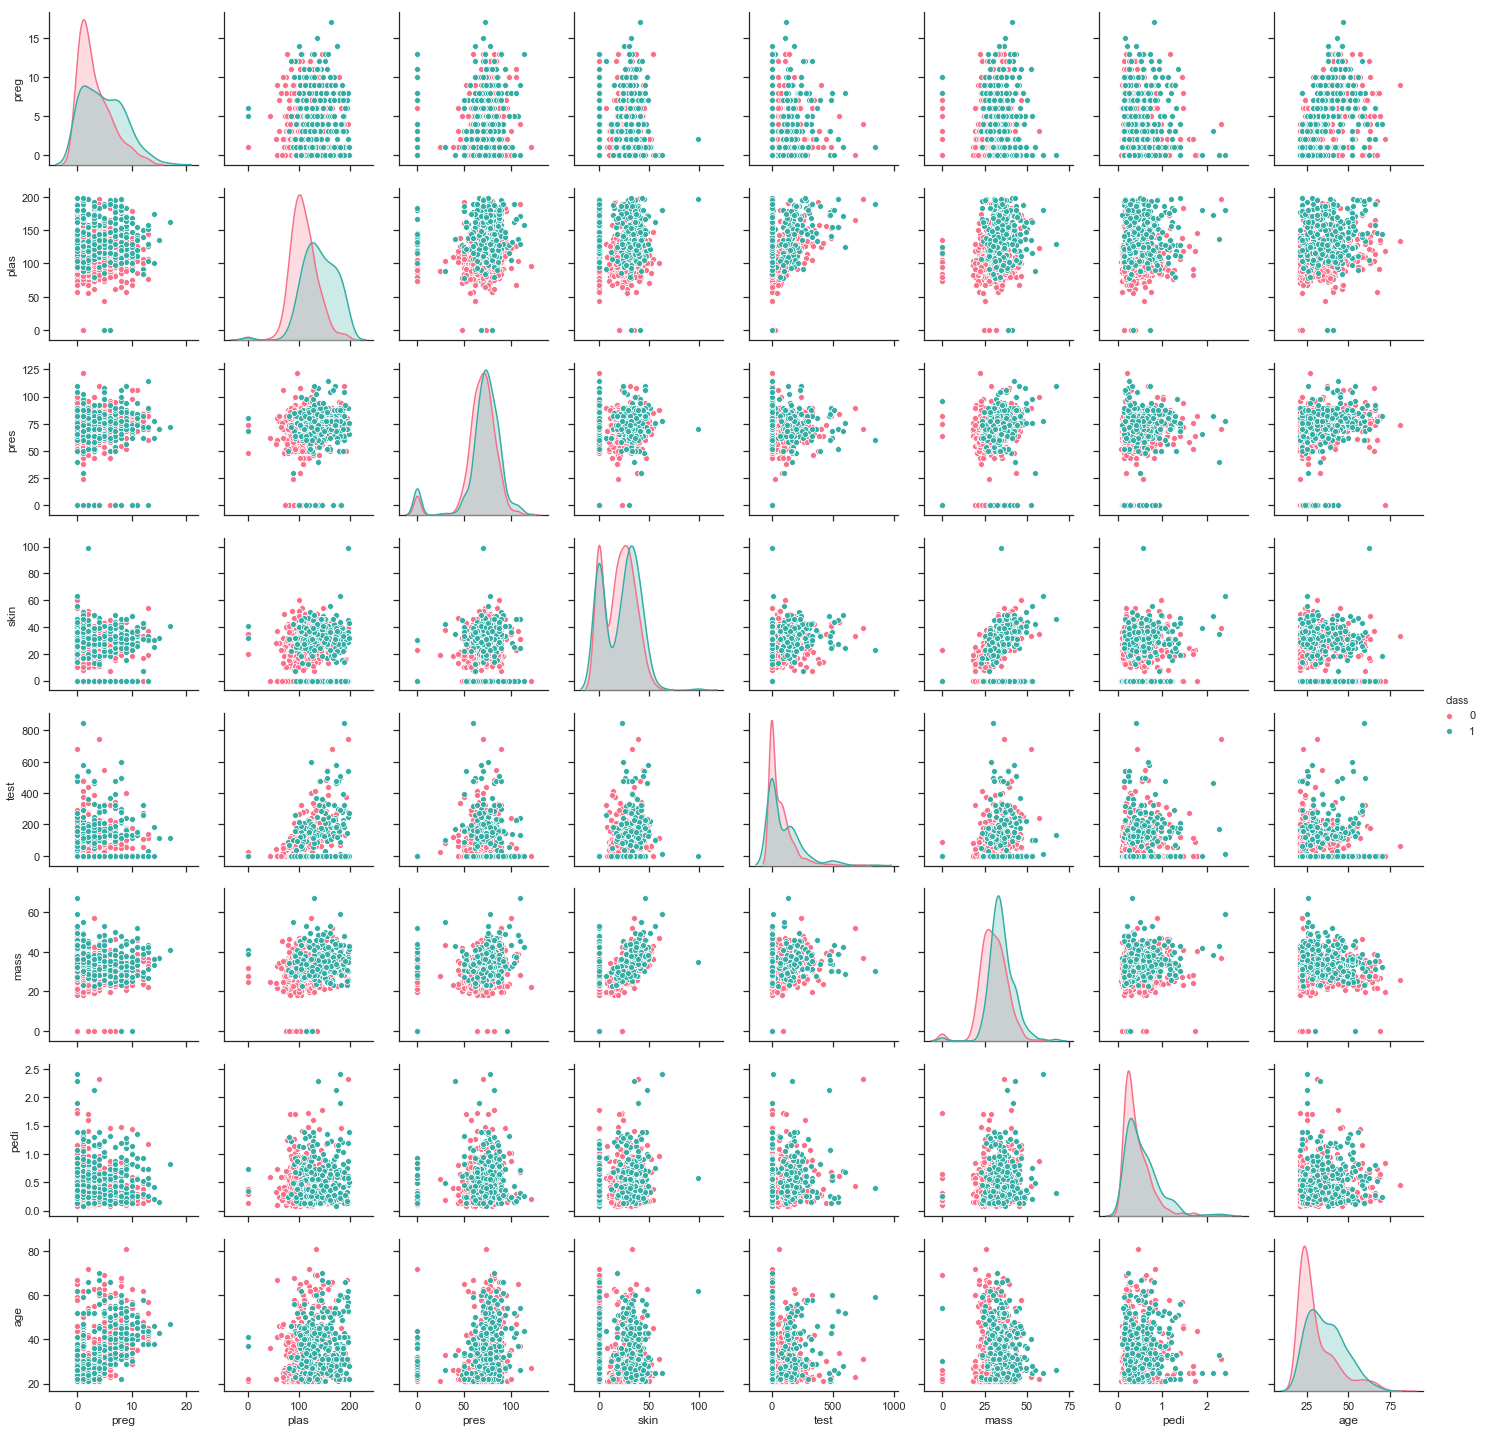

In [10]:
i = sns.pairplot(df, vars=['preg',
 'plas',
 'pres',
 'skin','test', 'mass', 'pedi', 'age'], hue='class', palette='husl')

In [11]:
df.drop('class', axis=1).corr()

,preg,plas,pres,skin,test,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


# KMeans

In [12]:
cluster_errors = []
for i in range(1,11):
    model = KMeans(i, random_state=2)
    model.fit(df.drop('class', axis=1).apply(zscore))
    cluster_errors.append(model.inertia_)

In [13]:
cluster_errors

[6144.0,
 5128.82021034658,
 4359.93739857424,
 3918.952267495887,
 3627.115620311771,
 3361.577802136576,
 3139.596558820661,
 2999.874662585204,
 2878.631522779213,
 2761.9838089887044]

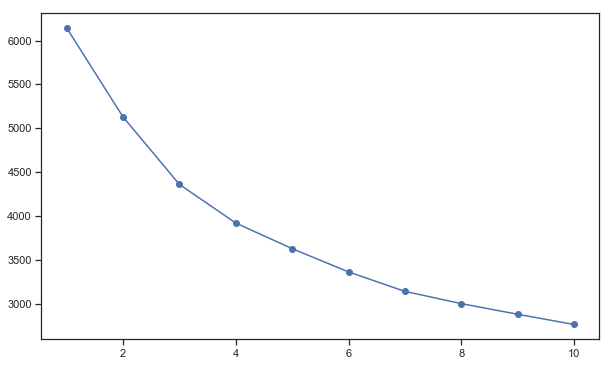

In [14]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,11),cluster_errors, marker='o')

In [15]:
model = KMeans(n_clusters=2, n_init=10, random_state=2)

In [16]:
model.fit(df.drop('class', axis=1).apply(zscore))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [17]:
model.cluster_centers_

array([[-0.52687846, -0.24732971, -0.22511561,  0.08964647,  0.02072395,
        -0.06688531, -0.01483706, -0.57494473],
       [ 0.94991955,  0.44591561,  0.40586537, -0.16162539, -0.03736362,
         0.12058884,  0.02675002,  1.03657919]])

In [18]:
model.inertia_

5128.82021034658

In [19]:
cen = pd.DataFrame(model.cluster_centers_, columns=df.drop('class', axis=1).columns)

In [20]:
cen

,preg,plas,pres,skin,test,mass,pedi,age
0,-0.526878,-0.247330,-0.225116,0.089646,0.020724,-0.066885,-0.014837,-0.574945
1,0.949920,0.445916,0.405865,-0.161625,-0.037364,0.120589,0.026750,1.036579


In [21]:
df.sample(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
44,7,159,64,0,0,27.4,0.294,40,0
272,3,122,78,0,0,23.0,0.254,40,0
220,0,177,60,29,478,34.6,1.072,21,1
168,4,110,66,0,0,31.9,0.471,29,0
230,4,142,86,0,0,44.0,0.645,22,1


In [22]:
df.drop('class', axis=1).apply(zscore).head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


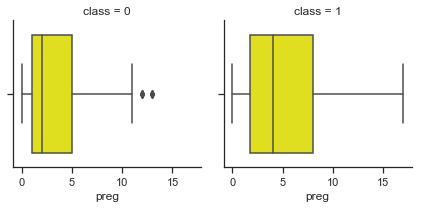

In [23]:
a = sns.FacetGrid(df, col='class')
a.map(sns.boxplot, 'preg', color='yellow', order=['0','1'])

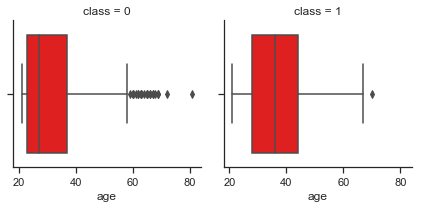

In [24]:
a = sns.FacetGrid(df, col='class')
a.map(sns.boxplot, 'age', color='red', order=['0','1'])

In [25]:
df1 = df.drop('class', axis=1).copy()

In [26]:
df1.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
df1['lables'] = model.labels_

In [28]:
df1.sample(15)

,preg,plas,pres,skin,test,mass,pedi,age,lables
499,6,154,74,32,193,29.3,0.839,39,1
82,7,83,78,26,71,29.3,0.767,36,1
70,2,100,66,20,90,32.9,0.867,28,0
219,5,112,66,0,0,37.8,0.261,41,1
512,9,91,68,0,0,24.2,0.200,58,1
169,3,111,90,12,78,28.4,0.495,29,0
434,1,90,68,8,0,24.5,1.138,36,0
685,2,129,74,26,205,33.2,0.591,25,0
126,3,120,70,30,135,42.9,0.452,30,0
387,8,105,100,36,0,43.3,0.239,45,1


In [29]:
df1['lables'].value_counts()

0    494
1    274
Name: lables, dtype: int64

In [30]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [31]:
df1.loc[100:150].sample(10)

,preg,plas,pres,skin,test,mass,pedi,age,lables
109,0,95,85,25,36,37.4,0.247,24,0
100,1,163,72,0,0,39.0,1.222,33,0
106,1,96,122,0,0,22.4,0.207,27,0
101,1,151,60,0,0,26.1,0.179,22,0
104,2,85,65,0,0,39.6,0.930,27,0
136,0,100,70,26,50,30.8,0.597,21,0
111,8,155,62,26,495,34.0,0.543,46,1
129,0,105,84,0,0,27.9,0.741,62,1
143,10,108,66,0,0,32.4,0.272,42,1
134,2,96,68,13,49,21.1,0.647,26,0


In [32]:
pima_df_scaled = df.drop('class', axis=1).apply(zscore)

In [33]:
pima_df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [34]:
pima_df_scaled['labels'] = model.labels_

In [35]:
pima_df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age,labels
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0


In [36]:
pima_clust = pima_df_scaled.groupby(['labels'])

In [37]:
df0 = pima_clust.get_group(0)
df1 = pima_clust.get_group(1)

In [38]:
cen

,preg,plas,pres,skin,test,mass,pedi,age
0,-0.526878,-0.247330,-0.225116,0.089646,0.020724,-0.066885,-0.014837,-0.574945
1,0.949920,0.445916,0.405865,-0.161625,-0.037364,0.120589,0.026750,1.036579


In [40]:

I0 = 0
I1 = 0 

for i in range(0, len(df0)):
    I0 = I0 + np.sum((df0.iloc[i:i+1,0:8].values - cen[0:1].values)**2)
for i in range(0, len(df1)):
    I1 = I1 + np.sum((df1.iloc[i:i+1,0:8].values - cen[1:2].values)**2)

In [41]:
print(I0)
print(I1)

print('Inertia',I0+I1)

3097.0527038547393
2031.767506491842
Inertia 5128.820210346581


In [42]:
c0 = model.cluster_centers_[0,:]
c1 = model.cluster_centers_[1,:]


In [43]:
c0

array([-0.52687846, -0.24732971, -0.22511561,  0.08964647,  0.02072395,
       -0.06688531, -0.01483706, -0.57494473])

In [44]:
c1

array([ 0.94991955,  0.44591561,  0.40586537, -0.16162539, -0.03736362,
        0.12058884,  0.02675002,  1.03657919])

In [45]:
I0 = 0
I1 = 0
I2 = 0
for i in np.arange(df0.shape[0]):
    I0 = I0+np.sum(((df0.iloc[i,:-1])-c0)**2)
for i in np.arange(df1.shape[0]):
    I1 = I1+np.sum(((df1.iloc[i,:-1])-c1)**2)

In [46]:
print(I0)
print(I1)
print(I2)

3097.0527038547393
2031.767506491842
0


In [47]:
I0 + I1

5128.820210346581

# AgglomerativeClustering

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
agglo_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [50]:
pima_df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age,labels
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0


In [51]:
agglo_model.fit(pima_df_scaled.drop('labels', axis=1))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [52]:
L = pd.DataFrame(agglo_model.labels_, columns= ['labels'])

In [53]:
L['labels'].value_counts()

0    426
1    342
Name: labels, dtype: int64

In [57]:
l = L.join(pima_df_scaled.drop('labels', axis=1))

In [58]:
l.head()

,labels,preg,plas,pres,skin,test,mass,pedi,age
0,1,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,0,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,0,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,1,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [59]:
pima_clust = l.groupby(['labels'])

In [60]:
df0 = pima_clust.get_group(0)
df1 = pima_clust.get_group(1)

print(df0.shape)
print(df1.shape)


(426, 9)
(342, 9)


In [61]:
df0.head()

,labels,preg,plas,pres,skin,test,mass,pedi,age
1,0,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
3,0,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
5,0,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,0,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,0,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847


In [62]:
c0 = np.mean(df0.iloc[:,1:5]).values
c0

array([-0.49981839, -0.36734255, -0.2776545 , -0.04896488])

In [63]:
c1 = np.mean(df1.iloc[:,1:5]).values
c1

array([0.6225808 , 0.45756704, 0.34585034, 0.06099135])

In [66]:
vir = 0
seto = 0 
ver = 0
for i in range(0, len(df0)):
    vir = vir + np.sum((df0.iloc[i:i+1,1:5].values - c0)**2)
for i in range(0, len(df1)):
    seto = seto + np.sum((df1.iloc[i:i+1,1:5].values - c1)**2)


print(vir)
print(seto)
print(ver)
print('Inertia',vir+seto+ver)

1379.2114898509067
1248.6736833522411
0
Inertia 2627.885173203148


In [67]:
pima_df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age,labels
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0


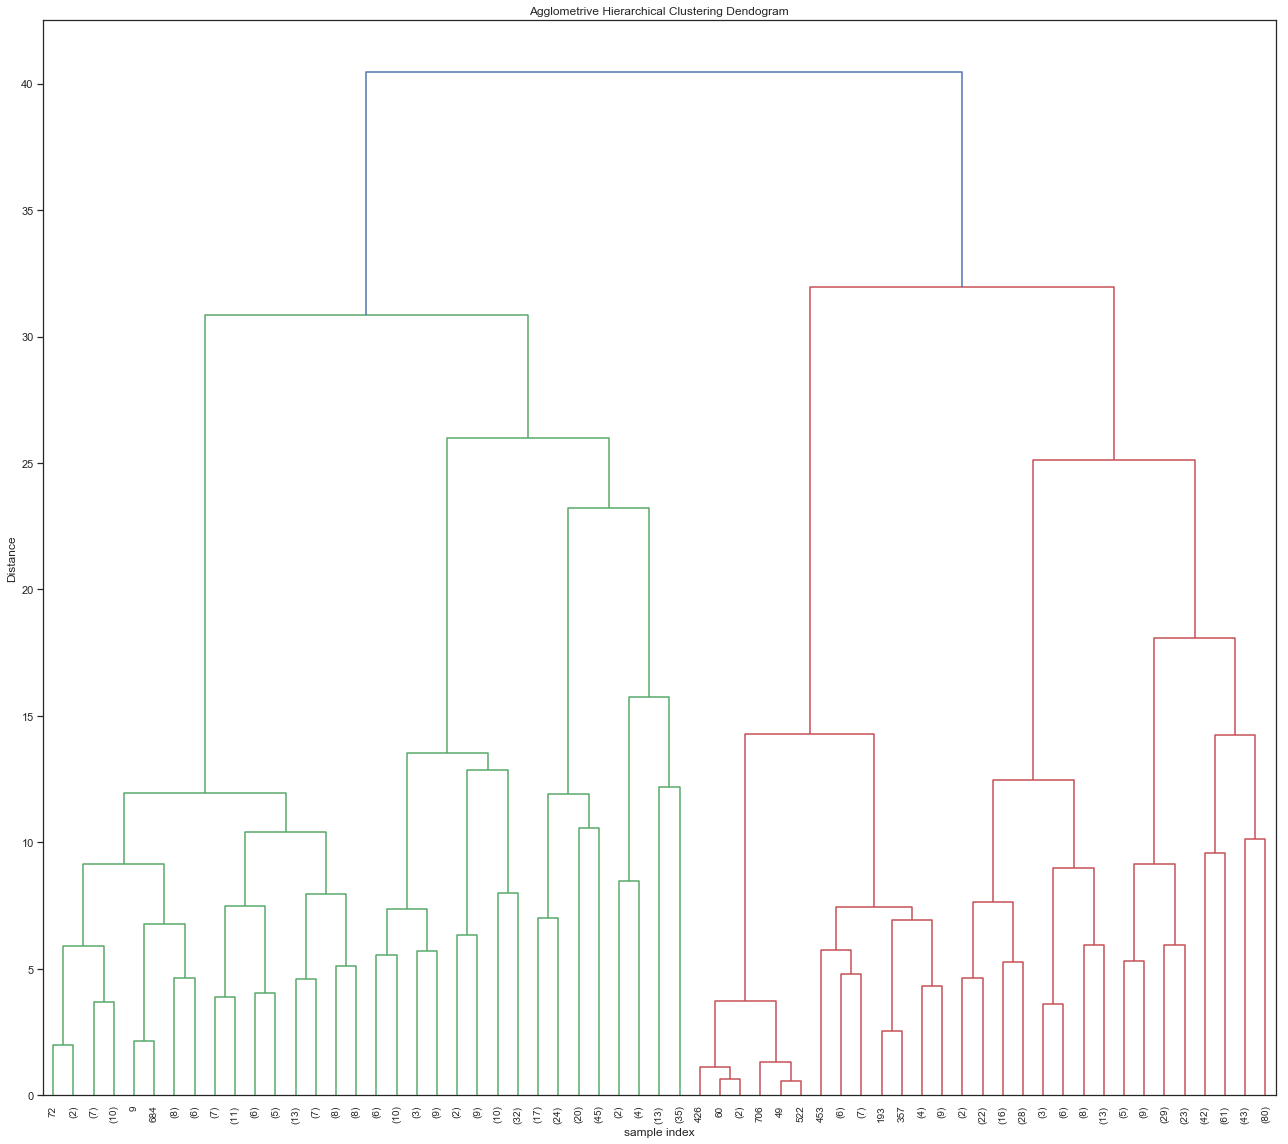

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglometrive Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
z = linkage(pima_df_scaled.drop('labels', axis=1), 'ward')
dendrogram(z,  leaf_rotation=90.0,p=5, color_threshold=35, leaf_font_size=10, truncate_mode='level')
plt.tight_layout()

In [70]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
data_pima = df.drop('class', axis=1)

In [72]:
data_pima.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss = StandardScaler()

In [75]:
data_pima_scaled = ss.fit_transform(data_pima)

In [76]:
data_pima_scaled = pd.DataFrame(data_pima_scaled, columns=data_pima.columns)

In [77]:
data_pima_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [78]:
# np.cov work with row wise and .T is given for 
cov_matrix = np.cov(data_pima_scaled.T)
cov_matrix = np.cov(data_pima_scaled, rowvar=False)

In [79]:
print(list(data_pima_scaled))
print(cov_matrix)

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


In [80]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# eigenvalues and right eigenvectors

In [81]:
# vectors are column wise
print(list(data_pima_scaled))
eig_vecs

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

In [82]:
# magnitude of vectors
eig_vals

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

In [83]:
tot = sum(eig_vals)

In [84]:
tot

8.01043024771838

In [85]:
# norminized percintile
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]

In [86]:
# variance holde in data set in percentage
var_exp

[26.179749316110048,
 21.640126757746508,
 12.870373364801917,
 10.944113047600453,
 9.529304819389637,
 8.53285484933116,
 5.247702246321921,
 5.055775598698369]

In [87]:
cum_var_exp = np.cumsum(var_exp)

In [88]:
# cumvariance holde in data set in percentage
cum_var_exp

array([ 26.17974932,  47.81987607,  60.69024944,  71.63436249,
        81.16366731,  89.69652215,  94.9442244 , 100.        ])

In [89]:
# magnitude of vectors
eig_vals

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

In [90]:
eig_pair = [(eig_vals[index], eig_vecs[:, index]) for index in range(len(eig_vals))]

In [91]:

eig_pair

[(2.097110557994525,
  array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
         -0.45194134, -0.27061144, -0.19802707])),
 (1.7334672594471252,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0.122069  , -0.62058853])),
 (0.42036352804956806,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, -0.08609107,  0.71208542])),
 (0.40498937781489913,
  array([ 0.11784098,  0.45035526, -0.01129554,  0.5662838 , -0.54862138,
         -0.34151764, -0.00825873, -0.21166198])),
 (0.6835183858447279,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.7633383156496728,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.8766705419094806,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595,

In [92]:
# eig_pair.sort(reverse=True)
eig_pair.sort()
eig_pair.reverse()

In [93]:
eig_pair

[(2.097110557994525,
  array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
         -0.45194134, -0.27061144, -0.19802707])),
 (1.7334672594471252,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0.122069  , -0.62058853])),
 (1.0309722810083828,
  array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
          0.36186463, -0.43318905, -0.07524755])),
 (0.8766705419094806,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, -0.8336801 , -0.0712006 ])),
 (0.7633383156496728,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.6835183858447279,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.42036352804956806,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, 

In [94]:
# final value after sorted
sorted_eig_values = [eig_pair[index][0] for index in range(len(eig_vals))]

In [95]:
sorted_eig_values

[2.097110557994525,
 1.7334672594471252,
 1.0309722810083828,
 0.8766705419094806,
 0.7633383156496728,
 0.6835183858447279,
 0.42036352804956806,
 0.40498937781489913]

In [96]:
sorted_eig_vectors = [eig_pair[index][1] for index in range(len(eig_vals))]

In [97]:
# vectors are row-wise
sorted_eig_vectors

[array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
        -0.45194134, -0.27061144, -0.19802707]),
 array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
         0.1009598 ,  0.122069  , -0.62058853]),
 array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
         0.36186463, -0.43318905, -0.07524755]),
 array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
        -0.05364595, -0.8336801 , -0.0712006 ]),
 array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
        -0.25320376, -0.11981049,  0.10928996]),
 array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
        -0.68537218,  0.08578409,  0.03335717]),
 array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
        -0.03536644, -0.08609107,  0.71208542]),
 array([ 0.11784098,  0.45035526, -0.01129554,  0.5662838 , -0.54862138,
        -0.34151764, -0.00825873, -0.21166198])]

In [98]:
tot = sum(sorted_eig_values)

In [99]:
sorted_var_exp = [(i/tot) for i in sorted(sorted_eig_values, reverse=True)]

In [100]:
sorted_var_exp

[0.2617974931611004,
 0.21640126757746506,
 0.12870373364801915,
 0.10944113047600451,
 0.09529304819389635,
 0.08532854849331159,
 0.0524770224632192,
 0.05055775598698367]

In [101]:
cum_var_exp = np.cumsum(sorted_var_exp)

In [102]:
cum_var_exp

array([0.26179749, 0.47819876, 0.60690249, 0.71634362, 0.81163667,
       0.89696522, 0.94944224, 1.        ])

In [103]:
P_reduce = np.array(sorted_eig_vectors[0:8]).transpose()

In [104]:
P_reduce

array([[-0.1284321 , -0.59378583,  0.01308692, -0.08069115,  0.47560573,
        -0.19359817, -0.58879003,  0.11784098],
       [-0.39308257, -0.17402908, -0.46792282,  0.40432871, -0.46632804,
        -0.09416176, -0.06015291,  0.45035526],
       [-0.36000261, -0.18389207,  0.53549442, -0.05598649, -0.32795306,
         0.6341159 , -0.19211793, -0.01129554],
       [-0.43982428,  0.33196534,  0.2376738 , -0.03797608,  0.48786206,
        -0.00958944,  0.28221253,  0.5662838 ],
       [-0.43502617,  0.25078106, -0.33670893,  0.34994376,  0.34693481,
         0.27065061, -0.13200992, -0.54862138],
       [-0.45194134,  0.1009598 ,  0.36186463, -0.05364595, -0.25320376,
        -0.68537218, -0.03536644, -0.34151764],
       [-0.27061144,  0.122069  , -0.43318905, -0.8336801 , -0.11981049,
         0.08578409, -0.08609107, -0.00825873],
       [-0.19802707, -0.62058853, -0.07524755, -0.0712006 ,  0.10928996,
         0.03335717,  0.71208542, -0.21166198]])

In [105]:
Proj_data_2D = np.dot(data_pima_scaled, P_reduce)

In [106]:
Proj_data_2D.shape

(768, 8)

In [107]:
Proj_data_2D

array([[-1.06850273, -1.23489499, -0.09592984, ..., -0.35718251,
         0.85882133,  0.97430355],
       [ 1.12168331,  0.73385167,  0.71293816, ...,  0.40632934,
         0.75703403,  0.35421454],
       [ 0.39647671, -1.59587594, -1.76067844, ...,  0.04001752,
        -1.15299029,  1.06852795],
       ...,
       [ 0.28347525, -0.09706503,  0.07719194, ...,  0.53826993,
        -0.33556321,  0.2894389 ],
       [ 1.06032431, -0.83706234, -0.42503045, ..., -0.15330712,
         1.18030813, -0.53434386],
       [ 0.83989172,  1.15175485,  1.00917817, ...,  0.15009639,
         0.24523536,  0.51594622]])